# Getting started with Matplotlib and `segretini-matplottini`, with a barplot

If you are here, chances are that you are tired of dull spreadsheet-like plots, and you want to bring your visualization skills to the next level to obtain a fabled `the paper's plots are so beautiful` comment from Reviewer #2.

🚂 Let's get started! In this notebook, we will see an introduction to [Matplotlib](https://matplotlib.org) and [Seaborn](https://seaborn.pydata.org), but most importantly to some of the key concepts to keep in mind when creating a great visualization. We will also see how `segretini-matplottini` can make our life easier, speeding up some of the complexity related to bringing your plots up to shape.

In the end, we will no longer create plots like the first one, and we will be able to create plots like the second one.

<div>
<img src="../plots/notebooks/1_getting_started_with_barplots/the_ugliest_barplot.png" height="300"/>
<img src="../plots/notebooks/1_getting_started_with_barplots/a_much_better_barplot.png" height="300"/>
</div>

## Exploratory visualization vs message-delivery plotting

Not all visualizations are created with the same goal. As such, not all plots have the same needs.
A major distinction happens between the following two categories: **exploratory visualization** and **message-delivery plotting**, a name I just made up and that will be clear in a second.

### 🔎 Exploratory visualization
The idea of exploratory visualization is that you have some data that you know very little about, and you want to learn something more about it. The main point is that **you don't know yet what you are looking for**. You might have a hint, but the unknowns are more than what's known.

The most common situation is *exploratory data analysis*: you have a dataset, and want to understand something about it, e.g. class distributions, with the goal of building a predicting model that can leverage this newly discovered information.
Another common situation is where you run a very complex experiment that tracks many metrics over multiple benchmark datasets. You don't know in advance what to expect, and you can use an exploratory visualization to make order in the chaos.

Exploratory visualization lies in the world of fast prototyping. The main audience of an exploratory visualization is **yourself** (or a narrow pool of people who's knowledeable about the topic). **The goal is to use visualizations to understand something new.**

### ⭐️ Message-delivery plotting

In message-delivery plotting, you want to convey a message to an external target audience, and you need to convince this audience that your message is true. 
For example, that your algorithm is more accurate than all the existing implementations of that same algorithm. 

How to best deliver the message is up to you: a sentence, a table, or a visualization. In many cases, a well-made visualization is the most impactful approach.

In this situation, you know exactly what you want to show, and your goal is to show it in the **clearest way possible**. It has to be polished, curated, clutter-free. It takes a long time, trial and error, and patience.

Message-delivery plotting is the focus of this notebook, and of `segretini-matplottini`. We don't focus on exploratory visualization. If you want to know more about exploratory visualization, there are plenty of valid options, such as Seaborn's [`FacetGrid`](https://seaborn.pydata.org/tutorial/axis_grids.html) and [Plotly](https://plotly.com/python/).

## Getting started

To run the following code, install `segretini-matplottini` as explained in the [README](../README.md). As a reminder, the following should suffice.

```shell
git clone https://github.com/AlbertoParravicini/segretini-matplottini.git
cd segretini-matplottini
pip install ".[notebook]"
jupyter notebook notebooks/1_getting_started_with_barplots.ipynb
```

# Building a plot with Matplotlib

Matplotlib's plots are created by building a `Figure` and one or more `Axes` within the `Figure`. Each `Axes` is a single plot (for example, a barplot), and a `Figure` can contain multiple `Axes` (for example, a grid of barplots). The following code shows how to build the simplest plot, which, for now, is empty.

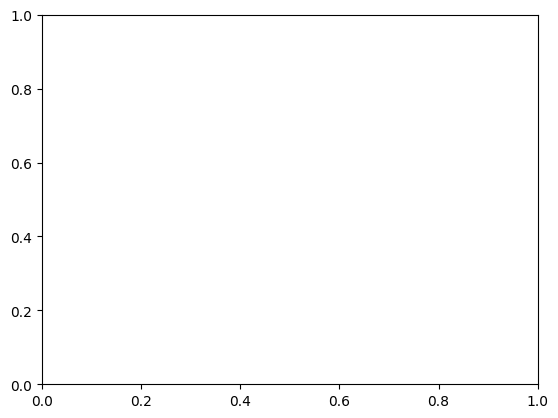

In [2]:
# This is the main plotting library in Matplotlib;
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

# Reset Matplotlib to its default style settings;
plt.rcdefaults()

# Build a Figure containing a single Axes;
fig: Figure
ax: Axes
fig, ax = plt.subplots(nrows=1, ncols=1)

# Show the empty plot;
plt.show()

Let's unpack what we did above 🙌

First, we called `plt.rcdefaults()`. That's a bit out of the blue, but it's a very important command to remember. Matplotlib keeps a global state of style-related settings (we'll see later how to modify them), and this command ensures that everything is brought back to its default value before creating a plot. Without `plt.rcdefaults()`, it is easy to override some setting when creating multiple plots in the same script. Calling `plt.rcdefaults()` ensures that we always start from a blank state.

Then, we created a `Figure` with `plt.figure()`, and the figure contains a single `Axes` (that is, an `x-axis` and a `y-axis`). 
* We can pass additional arguments to `plt.subplots` to control the number of `Axes`, their layout, and the resolution of the plot. We'll see some of these options later.
    
Finally, we called `plt.show()` to display the plot. 
* The command can be omitted when working in a Jupyter notebook, as the plot will be displayed automatically. However, it is necessary when working in a Python script. 
* An even better practice, when writing a script, would be to call `fig.show()` instead of `plt.show()`, as it explicitly specifies which is the `Figure` to display.

Indeed, Matplotlib provides some shorthands to access the latest `Figure` and `Axes` available. 
  * To access the latest `Figure`, we can use `plt.gcf()`, and to access the latest `Axes`, we can use `plt.gca()`.
  * One can call `plt.show()` instead of `fig.show()`. That's equivalent to calling `plt.gcf().show()`.
  * Similarly, one can call `plt.save()` instead of `fig.save()`, or `plt.plot()` instead of `ax.plot()`.
  * My advice is to always use the `Figure` and `Axes` objects explicitly, as it reduces the chance of errors when working with multiple `Figures` and `Axes`.

# Let's load some data

We will use a simple dataset in this notebook. It contains the estimated quality of different predictive models over a few different datasets.

Remember that we are not doing an exploratory visualization, but we want to visualize some known results to convey a message. We know in advance the structure of the data we are loading, and we most likely know what to expect from this data. 
For example, we know that a certain model gave better predictions than another, and we want to show it in out plot.

We use `pandas` to handle datasets, since we are going to create plots that benefit from a tabular representation.

In [3]:
import pandas as pd

# Load the data from the CSV;
data = pd.read_csv("../data/notebooks/1_getting_started_with_barplots/barplot_data.csv")

# This prints the dataset in a nice format, in the notebook;
data

,model,dataset,value
0,A,dataset_10,0.15
1,A,dataset_2,1.22
2,A,dataset_4,0.30
3,A,dataset_1,0.45
4,A,dataset_3,0.31
5,B,dataset_10,0.35
6,B,dataset_2,1.47
7,B,dataset_4,0.33
8,B,dataset_1,0.72
9,B,dataset_3,0.75


If we look at the data, we see that there are three models, and five datasets. In our experiments, model `A` is a baseline, which performs quite poorly. Model `B` is the current state-of-the-art, and model `C` is our new amazing model.
Overall, model `C` is the best, when averaged across all datasets, and we want show that!

In [4]:
# Average the results of each model across datasets, and print the best model first;
data.groupby("model").mean(numeric_only=True).sort_values("value", ascending=False)

,value
model,
C,0.796
B,0.724
A,0.486


# Our first barplot

We use seaborn since it provides simple ways to plot using dataframes, and to group the plot elements (e.g. the bars) according to our needs. 

We can group the models by experiment, so that we can easily compare the models within each experiment.

Seaborn operates on top of Matplotlib, so we can create the plot within an existing `Axes`, and the output will also be an `Axes` that we can manipulate using any of the functionalities offered by Matplotlib. 

You could achieve the same result without using Seaborn, but it would be significantly more complex. Indeed, most of the plots in `segretini-matplottini` are created using Seaborn under the hood. Not all of them though! Check out [`timeseries`](../examples/plot_timeseries.py) or [`binary_classification`](../examples/plot_binary_classification.py) for examples of complex plots that are created with vanilla Matplotlib.

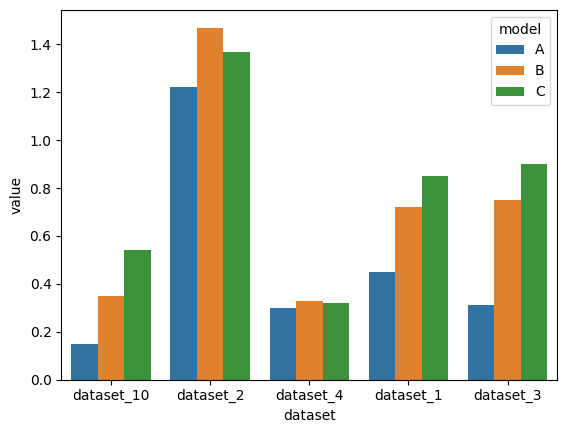

In [5]:
import seaborn as sns

# Reset Matplotlib to its default style settings;
plt.rcdefaults()

# Build a Figure containing a single Axes;
fig: Figure
ax: Axes
fig, ax = plt.subplots(nrows=1, ncols=1)

# Add a barplot with Seaborn on the Axes we just created;
sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Show the barplot;
plt.show()

## Things we do not like

Our barplot, out of the box, does not look that bad. It is arguably better than the dreaded spreadsheet plot that we started with. Less wasted white space, and more readable labels. But there are still many things that we can improve.

Let's list some areas of improvement that a trained plot-master would spot in a second.
* Is our model really the best? Sometimes it is better, sometimes it is worse. **The message that our model is the best is not clear, and that's the highest priority fix to make.**
* The legend is not informative. What's our model? What's `C`? Our model is `C`, but that's not written anywhere. 
* The magnitude of the differences is unclear. The y-axis has labeled ticks, but at a glance it's not possible to say that model `B` is 10% or 20% better or worse than something else.
* Does a higher bar even correspond to better quality?
* Colors are not meaningful.
* The order of the bar groups is wrong. Why would `dataset_10` appear before `dataset_1`?
* The size of the plot is likely to be wrong. If the goal is to put the plot in a publication or in some other place where space is limited, we need to guarantee that the plot uses the available space efficiently. 
* Overall, the style of the plot is very *vanilla*. Nothing wrong with that, but a bit of visual flair can make our visualization stand out from the crowd.

Before diving deper into these issues, it is a good moment to mention two important rules of thumb.

### Just one message

If you have ten datasets, it might be tempting to show the performance of the models across all datasets. The result will be very confusing and hard to read. Instead, showing the average performance across all datasets will deliver the message in a more intuitive way. Readers will spot the best model at a glance, instead of puzzling over the graph for minutes.

When creating a visualization, ask yourself **"What is the message that I want to convey?"**. Everything has to be aligned to the message. Everything else has to go.

### More is better, but only if it helps your message. 

This second point is strictly connected to the previous one. Adding more information to your plot, such an arrow that highlight the best performing model, a label that mentions how a higher score is better, or a grid that helps comparing distant bars, can make the delivery of your message more powerful. 

But adding elements for the sake of it, such as error bars in experiments where variance is minimal and all differences are statistically significant, or results divided across a dozen different datasets, will counterintuively weaken your message by making the plot harder to read.

Truth be told, there are many amazing papers that have plots just like the one we just drawn, and that did not weaken the quality of their research at all. But there are also many cases where a better plot can make your achievements clearer, and tip the balance in your favor.

# Making a better barplot

In the following sections, we will dissect the points in **"Thinks we do not like"**, and create a better barplot, one improvement at a time. Let's begin! 🤘

## Making our message stronger

The message that we want to deliver, in our plot, is that we have a new model whose quality is significantly better than the current state-of-the-art. The previous plot did not convey this message well. Sometimes our model is the best, but sometimes it is slightly worse. Letting the readers compute averages in their head, or draw conclusions by themselves, weakens the delivery of your message. 

### Showing the average performance of each model

The most impactful improvement we can make to our plot is to show the average performance of each model, across all datasets. Just like in our previous `DataFrame`, it will be obvious that model `C` (our model) is the best of the bunch.

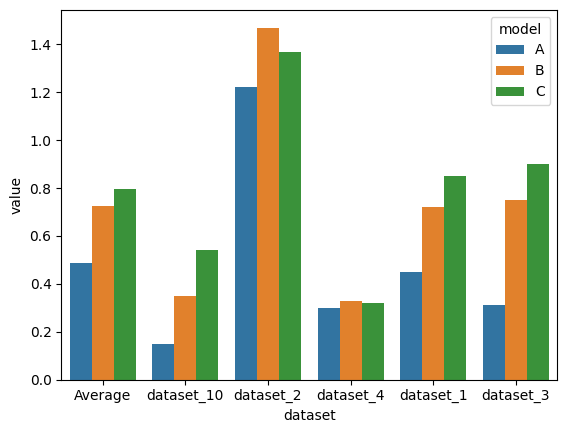

In [6]:
# Load the data from the CSV;
data = pd.read_csv("../data/notebooks/1_getting_started_with_barplots/barplot_data.csv")

# Average the results of each model across datasets;
average_results: pd.DataFrame = data.groupby("model").mean(numeric_only=True)

# We want to create a new DataFrame that contains the average results.
# To do so, we need to add the `model` and `dataset` columns back.
# The model column is already available, and it is the index of `average_results`.
# Let's make it a column again;
average_results = average_results.reset_index()
# The `dataset` column will have the value `Average` for all models, instead of being a specific dataset;
average_results["dataset"] = "Average"

# Create a new DataFrame that contains the average results.
# The DataFrame with the average results is added first, so that it is plotted first;
data = pd.concat([average_results, data])

# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Show the barplot;
plt.show()

A simple change can go a long way! Now it's obvious that model `C` has the highest bars on average, and model `A` has the lowest bars on average. 

But we are not done yet. Which one is our model? Does a higher bar denote a better model? How much are the differences between the models? Let's fix these problems one at a time.

### A better legend

Based on the nomenclature we chose in our experiments, we now that model `A` is a baseline, model `B` is the state-of-the-art, and model `C` is our model. But a reader will not know that! Let's use better names for our models.

There are multiple ways to do this. We could rename the values directly in the `DataFrame`, as follows.

```python
data["model"] = data["model"].replace({"A": "Baseline", "B": "State-of-the-art", "C": "Our model"})
```

This works, but we have other options that do not require modifications to our dataset. The advantage is that we have more flexibility. For example, we can refer to the same model in multiple ways, in different parts of the code. Also, it gives the chance to show how a Matplotlib works.

A Matplotlib legend contains `handles` and `labels`, and each `handle` corresponds to a `label`. An `handle` is the colored rectangle that identifies an element of the plot (a bar type, in our case). The `label` is the text that goes with the `handle`.

To update the entries of the legend, we first obtain the current `handles` and `labels`, then replace the `labels` with new ones.

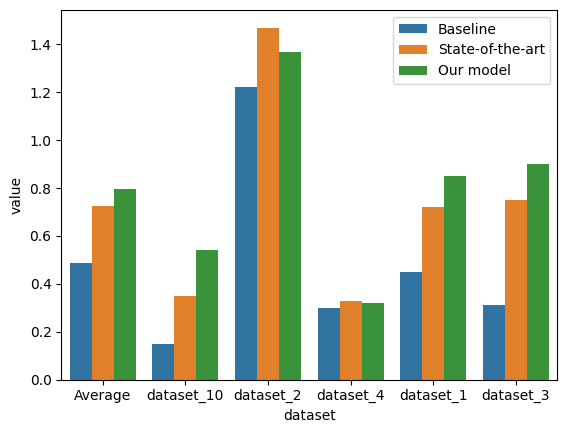

In [7]:
# Plot the results, like we did before;

plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Show the barplot;
plt.show()

### Is higher better?

From our plot, it is not immediately clear whether a higher bar corresponds to a better or worse outcome. It is intuitively true (we would not show it if the baseline was better than the other models), but there are many cases were the situation is not so clear-cut. For example, if you have multiple plots with different metrics, with some that have to be high and some that have to be low. In that case, helping the reader to understand the direction of improvement of each metric can make the plot significantly easier to read.

How do we improve the situation? Sometimes, having a meaningful y-axis label could be enough. A model's accuracy should always be as high as possible, and a latency should always be as low as possible. But what if you have a very domain-specific metric such as [NDCG@K](https://en.wikipedia.org/wiki/Discounted_cumulative_gain) or [LPIPS](https://arxiv.org/pdf/1801.03924.pdf)? Not everyone might be immediately familiar with their meaning. Also, what if you have a metric whose direction of improvement is context-dependent? For example, *CPU utilization*. If you are building a distributed job scheduler, you most likely want to maximize the CPU utilization of as few machines as possible. On the other hand, if you are building a low-profile task monitor, you want its CPU utilization to be as low as possible.

So, let's think of a better alternative. The simplest option is to just specify the direction of improvement in the y-label.

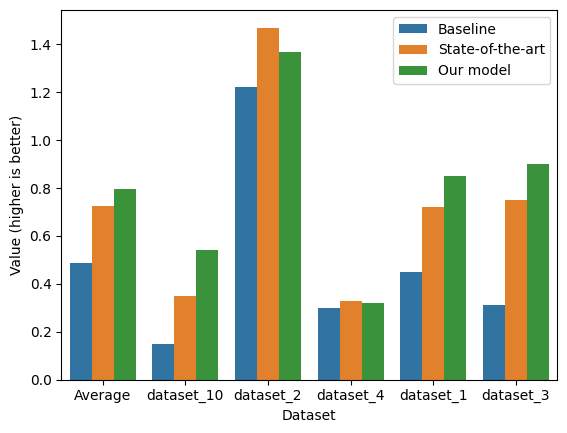

In [8]:
# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Update the y-axis label;
ax.set_ylabel("Value (higher is better)")
# Let's also update the x-axis label;
ax.set_xlabel("Dataset")

# Show the barplot;
plt.show()

Often, this is enough. But the rotated text might be hard to read, or you might not have enough vertical space for a long label. Let's see another, more complex, approach: adding a vertical arrow to indicate the direction of improvement. We will do this through a separate function, so that it can be reused later without repeating a lot of code. 

By the way, a similar function is available in `segretini-matplottini`, check out [`add_arrow_to_barplot`][add_arrow_to_barplot].

[add_arrow_to_barplot]: ../segretini_matplottini/utils/plot.py#L125

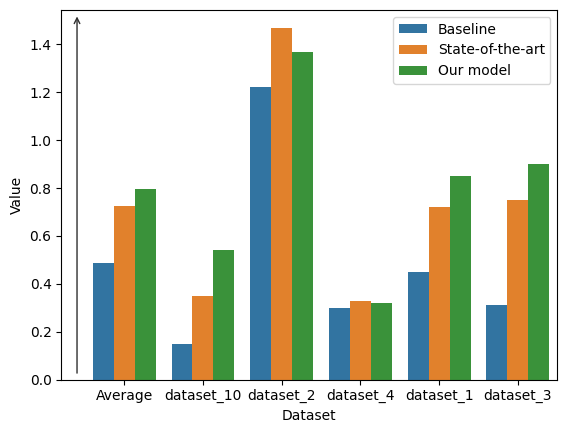

In [9]:
from matplotlib.patches import Rectangle


def higher_is_better_arrow(ax: Axes, linewidth: float = 1) -> Axes:
    # We need to create a bit of whitespace to the left of the plot, to add the arrow.
    # `ax.get_xlim()` returns a tuple with the left and right limits of the x-axis,
    # and we update it with `ax.set_xlim()`. The right limit is unchanged;
    ax.set_xlim(ax.get_xlim()[0] - 0.3, ax.get_xlim()[1])
    # To draw an arrow, we need to know the x and y coordinates of the start and end points.
    # The x coordinate is halfway through the x-axis left limit, and the start of the first bar.
    # `ax.patches` returns a list of all the patches present in the plot.
    # In our case, all the patches are `Rectangles`, since we have a barplot;
    first_bar: Rectangle = ax.patches[0]
    x_coord: float = first_bar.get_x() - (first_bar.get_x() - ax.get_xlim()[0]) / 2
    # The y start coordinate is at 1% of the height, the end coordinate at 99% of the height.
    # By default, coordinates in Matplotlib are given in data coordinates.
    # To specify the y coordinates as a fraction of the height, we specify `xycoords=ax.get_yaxis_transform()`.
    # According to Matplotlib, "The x-direction is in data coordinates and the y-direction is in axis coordinates."
    y_start: float = 0.01
    y_end: float = 0.99
    ax.annotate(
        "",
        xy=(x_coord, y_end),
        xytext=(x_coord, y_start),
        arrowprops=dict(
            arrowstyle="->",
            color="#2f2f2f",  # Slightly gray, looks better than pure black;
            linewidth=linewidth,
        ),
        xycoords=ax.get_xaxis_transform(),
    )
    return ax


# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Update the x-axis and y-axis labels;
ax.set_xlabel("Dataset")
ax.set_ylabel("Value")

# Add the arrow to denote that higher values are better;
ax = higher_is_better_arrow(ax)

# Show the barplot;
plt.show()


## How much is the difference between bars?

Now we area clearly communicating that our model is the best. Still, by how much is it really the best? 5%? 10%? Hard to spot at a glance. Let's see how we can fix this.

### Adding a grid

The simplest improvement we can make is to add a grid to the y-axis. It will make it easier to connect the values on the y-axis to the height of the bars.

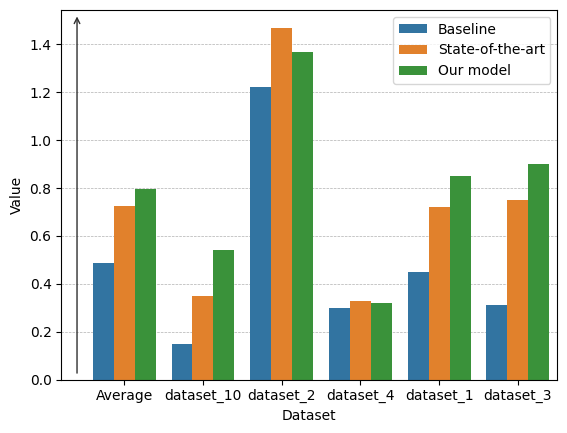

In [10]:
# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)

ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Update the x-axis and y-axis labels;
ax.set_xlabel("Dataset")
ax.set_ylabel("Value")

# Add the arrow to denote that higher values are better;
ax = higher_is_better_arrow(ax)

# Make sure that the grid is drawn below the bars, instead of above;
ax.set_axisbelow(True)
# Add a grid to the y-axis;
ax.grid(axis="y", linestyle="--", linewidth=0.5)

# Show the barplot;
plt.show()

### Adding labels to bar plots

While grids help identify the approximate magnitude of differences, we can be even more explicit, and directly add the values of each bar on top of it. To do so, we iterate over the bars, obtain their height, and add a textual label on top of the bar.

Once again, we create a separate function so that it will be easy to reuse. The vertical padding between the top of each bar and the label usually requires a bit of trial-and-error adjustment. The default value is sensible, but we leave it as an input parameter so that you can play with it.
The same happens for the font size of the label. If left `None`, Matplotlib will pick a default value. However, the default value might be too large or too small, so we might also need a bit of trial-and-error.

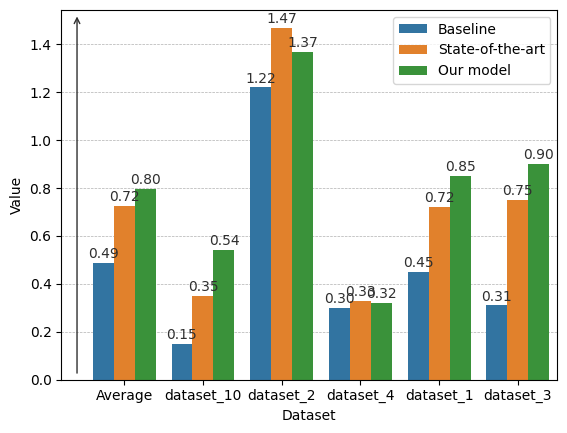

In [11]:
from typing import Optional


def add_labels_to_bars(ax: Axes, vertical_padding_percentage: float = 0.005, font_size: Optional[int] = None) -> Axes:
    # Keep only patches that correspond to bars.
    # Not strictly necessary since in our case all patches are bars,
    # but we want to be safe;
    bars: list[Rectangle] = [p for p in ax.patches if isinstance(p, Rectangle)]
    for bar in bars:
        # The label is placed at the center x-coordinate of a bar,
        # using data coordinates;
        label_x_coordinate = bar.get_x() + bar.get_width() / 2
        # The label is placed at the top of a bar,
        # with a % of extra space as vertical padding.
        # In this case we cannot use `ax.get_xaxis_transform()` since
        # the location has to be a function of the bar height.
        # Instead, we obtain the y-axis limits;
        height = bar.get_height()
        vertical_padding_data_coordinates = (ax.get_ylim()[1] - ax.get_ylim()[0]) * vertical_padding_percentage
        label_y_coordinate = height + vertical_padding_data_coordinates
        ax.text(
            x=label_x_coordinate,
            y=label_y_coordinate,
            s=f"{height:.2f}",  # Our label;
            ha="center",  # Horizontal alignment;
            va="bottom",  # Vertical alignment;
            color="#2f2f2f",  # Text color, slightly gray;
            fontsize=font_size,
        )
    return ax


# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)

ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Update the x-axis and y-axis labels;
ax.set_xlabel("Dataset")
ax.set_ylabel("Value")

# Add the arrow to denote that higher values are better;
ax = higher_is_better_arrow(ax)

# Make sure that the grid is drawn below the bars, instead of above;
ax.set_axisbelow(True)
# Add a grid to the y-axis;
ax.grid(axis="y", linestyle="--", linewidth=0.5)

# Add labels with absolute values on top of each bar;
ax = add_labels_to_bars(ax)

# Show the barplot;
plt.show()

See how the labels are too large, and overlap with each other? 

This is a sad truth of plotting: **as much as you can automate, there will always be a lot of manual fine-tuning to get things just right 👌**.

We can fix the problem by either rotating the labels vertically (passing `rotation=90` to `ax.text`), or by using a smaller font size. Let's go for the second approach, since it's usually more readable. Here, a font size of `6` is a good compromise between readability and fitting the labels within the figure. It took a couple of attempts to find the right value!

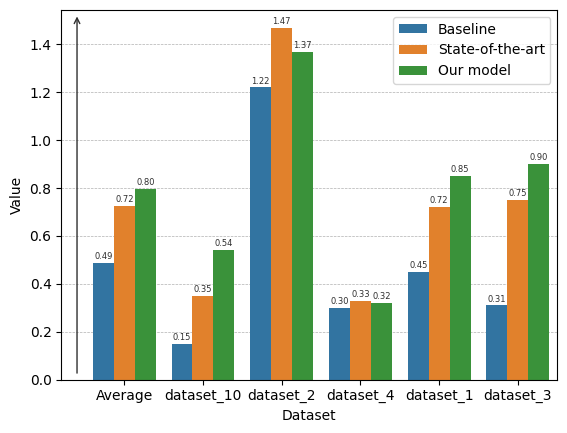

In [12]:
# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)

ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Update the x-axis and y-axis labels;
ax.set_xlabel("Dataset")
ax.set_ylabel("Value")

# Add the arrow to denote that higher values are better;
ax = higher_is_better_arrow(ax)

# Make sure that the grid is drawn below the bars, instead of above;
ax.set_axisbelow(True)
# Add a grid to the y-axis;
ax.grid(axis="y", linestyle="--", linewidth=0.5)

# Add labels with absolute values on top of each bar;
ax = add_labels_to_bars(ax, font_size=6)

# Show the barplot;
plt.show()

### Adding relative performance labels to our bars

Now we have labels with absolute values, and it's a great step further. We know that our model has a average performance of `0.80`, which is better that the `0.49` of the baseline. By how much? `1.7X`? `1.8X`? Don't let your audience figure out the math, do it for them!

Instead of labels with absolute values, we can use labels with relative values, **measured against a baseline value**. In this case, we can use the values of the baseline model as the reference.

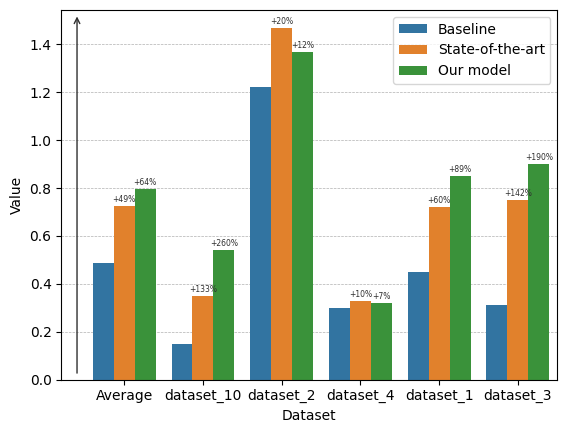

In [13]:
from matplotlib.container import BarContainer


def add_relative_performance_labels_to_bars(
    ax: Axes, vertical_padding_percentage: float = 0.005, font_size: Optional[int] = None
) -> Axes:
    # Computing relative performance is less trivial.
    # Bars are grouped in `BarContainer`, but each `BarContainer` contains
    # the bars for a given model, not for a single dataset!
    # So we need to re-group the bars so that they are grouped by dataset,
    # obtain the height of the minimum bar (the baseline), and compute the relative performance;
    containers: list[BarContainer] = ax.containers
    # From [container x bars] to [bars x container];
    bars_grouped_by_dataset: list[list[Rectangle]] = list(zip(*containers))
    relative_heights_by_group: list[list[float]] = []
    for group in bars_grouped_by_dataset:
        # Bar with the lowest value for each dataset;
        min_height = min([bar.get_height() for bar in group])
        # Compute the relative performance for each bar in the group;
        relative_heights_by_group.append([bar.get_height() / min_height for bar in group])
    # From [bars x container] to [container x bars], then flatten the list of values;
    relative_heights: list[float] = [value for group in zip(*relative_heights_by_group) for value in group]

    # Now we associate each bar to its corresponding label;
    bars: list[Rectangle] = [p for p in ax.patches if isinstance(p, Rectangle)]
    for bar, relative_height in zip(bars, relative_heights):
        # If the relative_height is 1 (i.e. the baseline), we can skip it;
        if relative_height == 1:
            continue
        label_x_coordinate = bar.get_x() + bar.get_width() / 2
        # We still need the absolute height of the bar, to place the label;
        height = bar.get_height()
        vertical_padding_data_coordinates = (ax.get_ylim()[1] - ax.get_ylim()[0]) * vertical_padding_percentage
        label_y_coordinate = height + vertical_padding_data_coordinates
        # But the label is the relative performance, as +X%;
        label = f"+{relative_height - 1:.0%}"
        ax.text(
            x=label_x_coordinate,
            y=label_y_coordinate,
            s=label,  # Our label;
            ha="center",  # Horizontal alignment;
            va="bottom",  # Vertical alignment;
            color="#2f2f2f",  # Text color, slightly gray;
            fontsize=font_size,
        )
    return ax


# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)

ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", ax=ax)

# Update the existing legend labels to have more meaningful names;
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

# Update the x-axis and y-axis labels;
ax.set_xlabel("Dataset")
ax.set_ylabel("Value")

# Add the arrow to denote that higher values are better;
ax = higher_is_better_arrow(ax)

# Make sure that the grid is drawn below the bars, instead of above;
ax.set_axisbelow(True)
# Add a grid to the y-axis;
ax.grid(axis="y", linestyle="--", linewidth=0.5)

# Add labels with relative performance values on top of each bar.
# Guess what? The labels are longer, so we need a smaller font size!
ax = add_relative_performance_labels_to_bars(ax, font_size=5.5)

# Show the barplot;
plt.show()

This second approach is not necessarily better than the first! For example, if the goal is to show the improvement of our model versus the state-of-the-art model, we would not get an immediate KPI for the quality improvement, since both labels (`+49%`, `+64%`) are measured relatively to the baseline bar. 

Instead, one might want to clarify that our model is `+11%` better than the state-of-the-art. You could do so by using the **state-of-the-art values are reference** for the relative performance bars, or by adding labels **for both absolute and relative performance**. Try different strategies and see what better suits your data and message.

## Choosing the right colors

Our current plot is reasonably good. It clearly communicates a message (that our model is the best, and it's 64% better than a baseline). But we can still do more. An important aspect is to choose meaningful colors. There is a strong degree of subjectivity here, but there are some general guidelines that can help us.

### Not everyone sees colors in the same way

A lot of people are color blind, and there are many types of color blindness! In general, make sure that your colors are distinguishable by color blind people.
Also, if you are planning to add your plot to a paper, remember that many researchers print papers in black and white. Always check that your colors are distinguishable in black and white! 
If colors are too similar, try adjusting the **L** (lightness) in the **HSL** representation, or the **B** (brightness) in the **HSB** representation.

### Hidden color biases

People tend to associate implicit meanings to colors. To simplify the matter as much as possible, green is often associated to positive things, while red is bad.
Also, colors with higher saturation, and colors with very low or high brightness, usually catch the attention first.

### Crafting a color palette

How do we choose a palette? Here are some utilities made available by Seaborn and `segretini-matplottini`.

* Seaborn has a [very thorough article](https://seaborn.pydata.org/tutorial/color_palettes.html) on choosing color palettes. It's a great reference to know more about the topic. It offers many of pre-defined palettes, and most of them will satisfy the criteria above.
* Seaborn `palplot` is a simple function that plots a list of colors. It's great to quickly iterate between different paletts, until you find something that you like.
* `segretini_matplottini.utils.convert_colors_to_grayscale` converts a list of colors to grayscale. You can combine it with `palplot` to ensure that your palette will work well when printed in black and white.
* `segretini_matplottini.utils.create_hex_palette` creates a palette with the specified number of colors, interpolating between a start and end color.

Finally, [Adobe Color](https://color.adobe.com/it/create/color-wheel) is a free tool built to create palettes. It provides many pre-made palettes, and accessibility tools to test for color blindness safety.

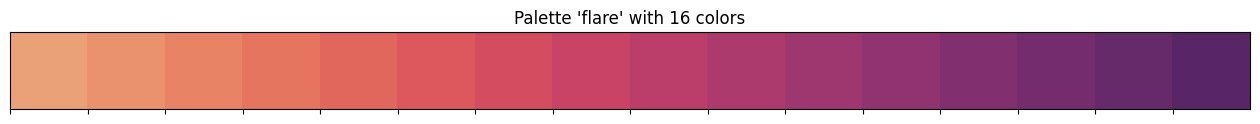

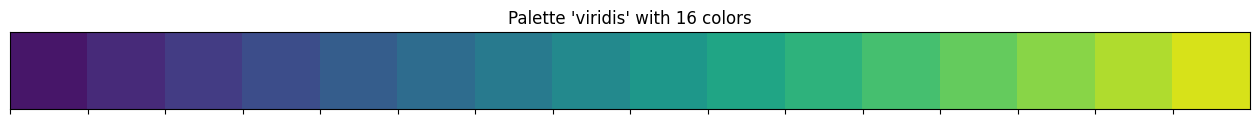

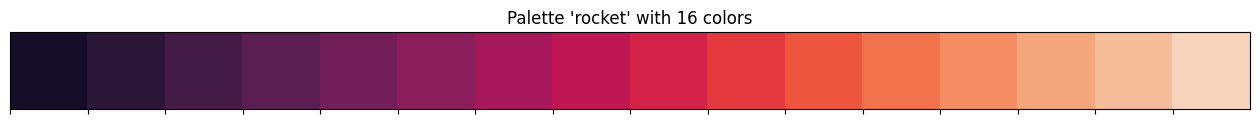

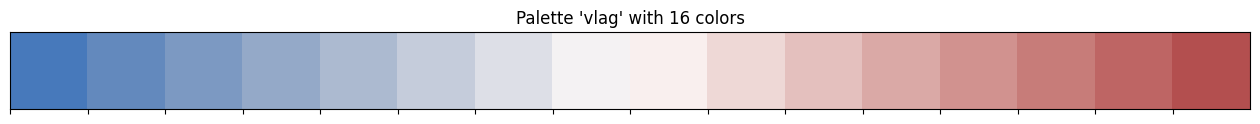

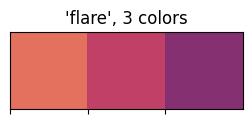

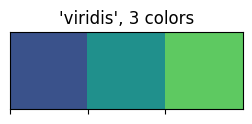

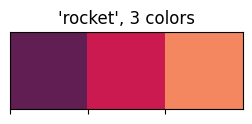

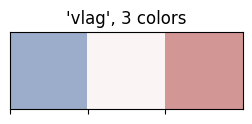

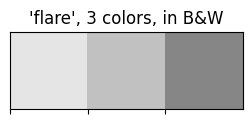

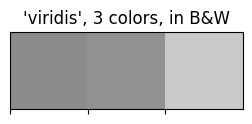

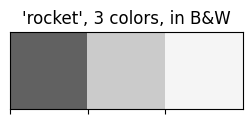

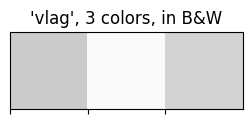

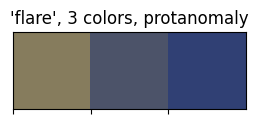

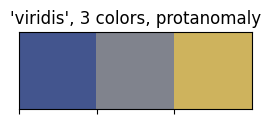

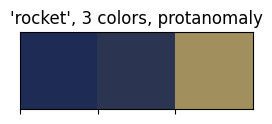

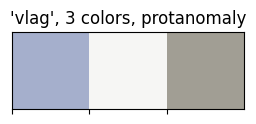

In [14]:
from segretini_matplottini.utils import convert_colors_to_grayscale, convert_colors_to_deficiency

# Plot some pre-defined color palettes in Seaborn.
# These are continous palettes, and we can specify how many colors we want;
number_of_colors = 16
palette_names = ["flare", "viridis", "rocket", "vlag"]
for palette_name in palette_names:
    # Create the palette as a list of RGB triplets;
    palette = sns.color_palette(palette_name, n_colors=number_of_colors)
    # Plot the palette;
    sns.palplot(palette)
    # Obtain the current plot, add the name of the palette to it;
    ax: Axes = plt.gca()
    ax.set_title(f"Palette '{palette_name}' with {number_of_colors} colors")

# Since we have three bars per group, let's see how they look with just 3 colors;
number_of_colors = 3
for palette_name in palette_names:
    palette = sns.color_palette(palette_name, n_colors=number_of_colors)
    sns.palplot(palette)
    ax: Axes = plt.gca()
    ax.set_title(f"'{palette_name}', {number_of_colors} colors")

# Let's see how they look in black and white.
# See how `viridis` and `vlag` have two almost identical colors, and would not work well in B&W.
number_of_colors = 3
for palette_name in palette_names:
    palette = sns.color_palette(palette_name, n_colors=number_of_colors)
    palette = convert_colors_to_grayscale(palette)
    sns.palplot(palette)
    ax: Axes = plt.gca()
    ax.set_title(f"'{palette_name}', {number_of_colors} colors, in B&W")

# See how they look when seen by the eyes of a person affected by protanomaly, a type of color deficiency;
number_of_colors = 3
for palette_name in palette_names:
    palette = sns.color_palette(palette_name, n_colors=number_of_colors)
    palette = convert_colors_to_deficiency(palette, deficiency="protanomaly")
    sns.palplot(palette)
    ax: Axes = plt.gca()
    ax.set_title(f"'{palette_name}', {number_of_colors} colors, protanomaly")

For our barplot, we can select colors by hand, since we need just three of them.
Since the first bar in each group is the baseline, we can give it a color that's mild but also different from the other bars, so that it doesn't draw too much attention.
On the other hand, we want to give to our model the most visible and striking color, so that it stands out from the other bars.

The following colors are taken from the `PALETTE_ORANGE_BASELINE_AND_GREEN_TONES` palette in `segretini_matplottini.utils.colors` module, which provides a few palettes and colors that are ready to use.  It looks good, and it works well in black and white too.

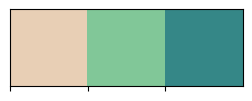

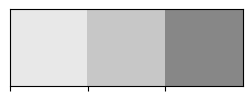

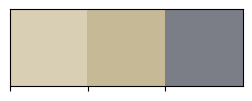

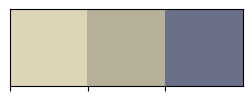

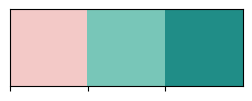

In [15]:
palette = ["#E8CFB5", "#81C798", "#358787"]
sns.palplot(palette)
palette_bw = convert_colors_to_grayscale(palette)
sns.palplot(palette_bw)
palette_protanomaly = convert_colors_to_deficiency(palette, "protanomaly", 1)
sns.palplot(palette_protanomaly)
palette_deuteranomaly = convert_colors_to_deficiency(palette, "deuteranomaly", 1)
sns.palplot(palette_deuteranomaly)
palette_tritanomaly = convert_colors_to_deficiency(palette, "tritanomaly", 1)
sns.palplot(palette_tritanomaly)

Let's apply the new palette to our barplot, using the `palette` attribute of `barplot`. The number of colors has to match the number of bars per group.
Our barplot will immediately look much better. 🎨

While we are at it, we can create a function to plot the current barplot, to avoid repeating the same code over and over.

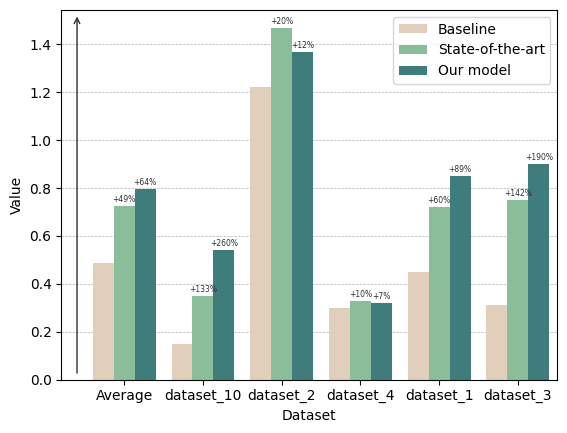

In [16]:
def barplot(data: pd.DataFrame, palette: list[str], ax: Axes) -> Axes:
    ax: Axes = sns.barplot(data=data, x="dataset", y="value", hue="model", palette=palette, ax=ax)

    # Update the existing legend labels to have more meaningful names;
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=["Baseline", "State-of-the-art", "Our model"])

    # Update the x-axis and y-axis labels;
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Value")

    # Add the arrow to denote that higher values are better;
    ax = higher_is_better_arrow(ax)

    # Make sure that the grid is drawn below the bars, instead of above;
    ax.set_axisbelow(True)
    # Add a grid to the y-axis;
    ax.grid(axis="y", linestyle="--", linewidth=0.5)

    # Add labels with relative performance values on top of each bar.
    # Guess what? The labels are longer, so we need a smaller font size!
    ax = add_relative_performance_labels_to_bars(ax, font_size=5.5)

# Plot the results, like we did before;
plt.rcdefaults()
fig, ax = plt.subplots(nrows=1, ncols=1)

# Main plot;
ax = barplot(data=data, palette=palette, ax=ax)

# Show the barplot;
plt.show()